In [1]:
from ipynb.fs.full.data_cleaning import df, serviceDf
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
38780,Events,Photo Booth Rental,Main,Life Moments LLC Photo Booth Rentals,24.00,200.00,,5.00,10007,New York City,New York,NY,"4,800.00"
33321,Wellness,Private Yoga Instruction,Main,Breaking Yoga,NaN,67.00,session,5.00,78701,Austin,Texas,TX,NaN
35626,Events,DJ,Main,The Vine Productions,3.00,300.00,,5.00,96813,Honolulu,Hawaii,HI,900.00


In [2]:
df.shape

(19400, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,11039,0.57
1,Events,3486,0.18
5,Wellness,1595,0.08
3,Lessons,1493,0.08
0,Business,1254,0.06
4,Pets,533,0.03


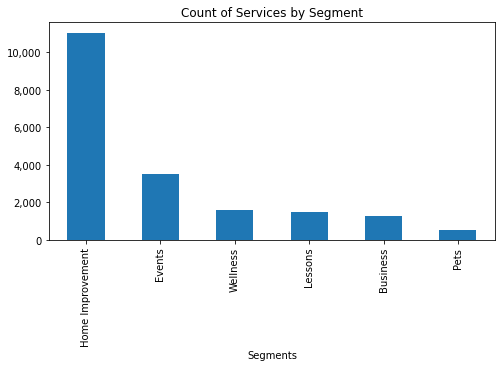

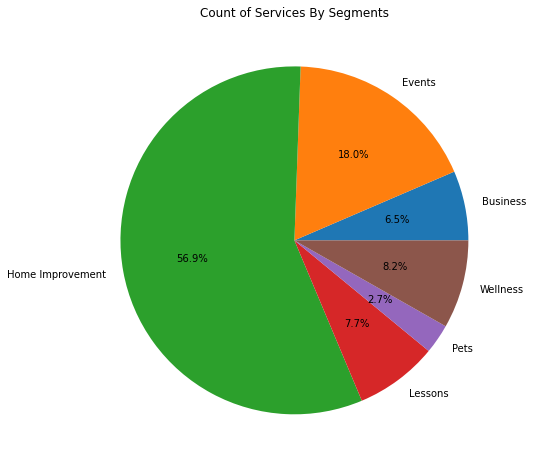

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Services,Count,Contribution
102,Wedding Officiant,839,0.04
33,Commercial Cleaning,832,0.04
1,Accounting,791,0.04
31,Closet and Shelving System Installation,754,0.04
104,Wedding and Event Makeup,712,0.04
72,Massage Therapy,697,0.04
44,DJ,684,0.04
68,Interior Design,627,0.03
87,Roof Repair or Maintenance,510,0.03
103,Wedding and Event Catering,504,0.03


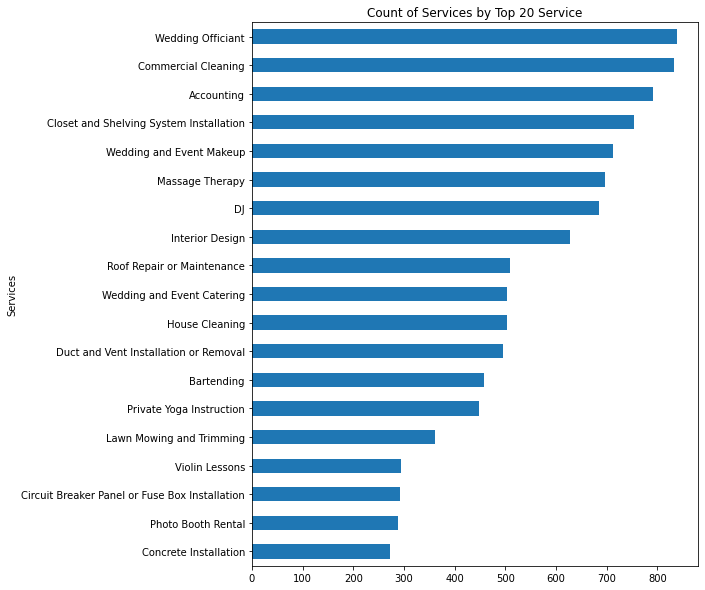

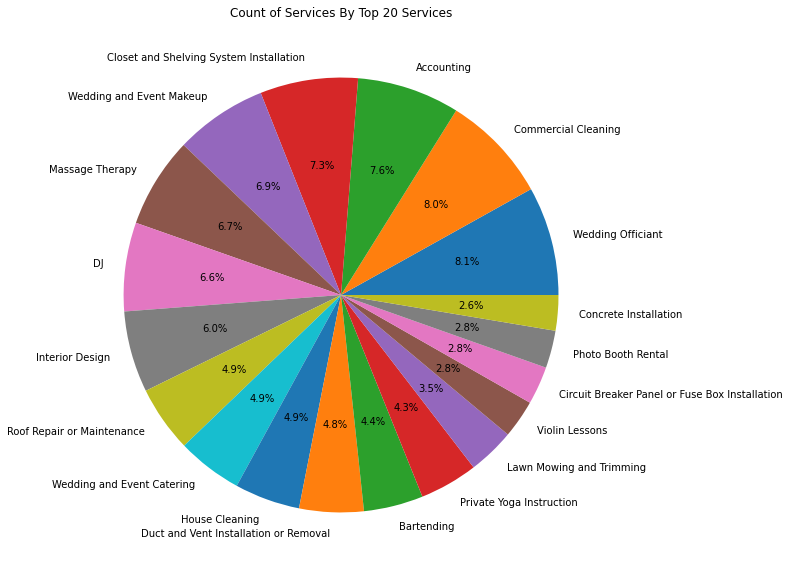

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

# Which segments are doing better or worse?

Maybe see implied revenue from these segments

In [7]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [8]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
2,Home Improvement,"26,409,464.00",0.45
1,Events,"21,770,915.00",0.37
0,Business,"4,122,263.00",0.07
5,Wellness,"3,562,406.00",0.06
3,Lessons,"2,172,309.00",0.04
4,Pets,"304,754.00",0.01


In [9]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
102,Wedding Officiant,"9,046,401.00",0.16
44,DJ,"5,589,660.00",0.10
77,Photo Booth Rental,"3,617,129.00",0.06
14,Bed Bug Extermination,"3,336,025.00",0.06
32,Commercial Carpet Cleaning,"3,054,133.00",0.05
33,Commercial Cleaning,"2,400,480.00",0.04
72,Massage Therapy,"2,149,258.00",0.04
104,Wedding and Event Makeup,"1,802,999.00",0.03
67,House Cleaning,"1,531,810.00",0.03


In [10]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"8,197,333.00",0.14
43,Texas,"5,840,538.00",0.10
9,Florida,"3,806,216.00",0.07
30,New Jersey,"2,692,872.00",0.05
32,New York,"2,375,215.00",0.04
10,Georgia,"2,180,083.00",0.04
5,Colorado,"2,045,141.00",0.04
25,Missouri,"1,973,629.00",0.03
33,North Carolina,"1,937,061.00",0.03


# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [11]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"411,731.00",0.62
1,Events,"129,867.00",0.20
5,Wellness,"38,272.00",0.06
0,Business,"37,767.00",0.06
3,Lessons,"31,698.00",0.05
4,Pets,"12,814.00",0.02


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [12]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
2,Home Improvement,11039,"411,731.00",37.30
1,Events,3486,"129,867.00",37.25
0,Business,1254,"37,767.00",30.12
4,Pets,533,"12,814.00",24.04
5,Wellness,1595,"38,272.00",23.99
3,Lessons,1493,"31,698.00",21.23


## Hires by Services

Look at the top 20.

In [13]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

#### Top 20 Hires Count

In [14]:
dfHiresCountServices.sort_values(by="Segments", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
83,Private Yoga Instruction,"3,866.00",0.01,Wellness
70,Life Coaching,"1,163.00",0.00,Wellness
72,Massage Therapy,"22,022.00",0.03,Wellness
74,Nutritionist,"3,208.00",0.00,Wellness
75,Personal Training,"7,458.00",0.01,Wellness
79,Private Pilates Instruction,555.00,0.00,Wellness
25,Cat Grooming,"3,754.00",0.01,Pets
76,Pet Sitting,"4,796.00",0.01,Pets
50,Dog Walking,"2,864.00",0.00,Pets
5,Aquarium Services,"1,400.00",0.00,Pets


#### Bottom 20 Hires Count

In [15]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[-19:]

,Services,Total Hires,Contribution,Segments
47,Deck or Porch Repair,"1,092.00",0.00,Home Improvement
100,Voice Over Lessons,"1,010.00",0.00,Lessons
81,Private Swim Lessons,986.00,0.00,Lessons
89,Science Tutoring,913.00,0.00,Lessons
9,Asphalt Installation,905.00,0.00,Home Improvement
88,Saxophone Lessons,896.00,0.00,Lessons
8,Asbestos Removal,859.00,0.00,Home Improvement
19,Cabinet Refinishing and Repair,783.00,0.00,Home Improvement
94,Social Sciences Tutoring,731.00,0.00,Lessons
97,Statistical Data Analysis,644.00,0.00,Business


### The Hires Ratio

In [16]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

#### Top 20 Hires Ratio

In [17]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
4,Appliance Repair or Maintenance,90,"10,775.00",119.72,Home Improvement
24,Carpet Repair or Partial Replacement,49,"5,564.00",113.55,Home Improvement
49,Dishwasher Installation,89,"9,956.00",111.87,Home Improvement
71,Logo Design,52,"5,573.00",107.17,Business
32,Commercial Carpet Cleaning,196,"20,847.00",106.36,Home Improvement
21,Carpet Cleaning,236,"23,342.00",98.91,Home Improvement
3,Appliance Installation,109,"10,441.00",95.79,Home Improvement
98,Test Prep Services,33,"2,998.00",90.85,Lessons
25,Cat Grooming,44,"3,754.00",85.32,Pets
66,Handyman,200,"15,295.00",76.47,Home Improvement


#### Bottom 20 Hires Ratio

In [18]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[-19:]

,Services,Count,Total Hires,Hire Ratio,Segments
50,Dog Walking,187,"2,864.00",15.32,Pets
65,General Contracting,241,"3,111.00",12.91,Home Improvement
63,Excavation Services,110,"1,405.00",12.77,Home Improvement
1,Accounting,791,"10,069.00",12.73,Business
12,Basement Finishing or Remodeling,153,"1,909.00",12.48,Home Improvement
9,Asphalt Installation,73,905.00,12.40,Home Improvement
90,Sewing Lessons,44,520.00,11.82,Lessons
10,Asphalt Repair and Maintenance,106,"1,204.00",11.36,Home Improvement
6,Architectural Services,125,"1,315.00",10.52,Home Improvement
38,Construction Services,125,"1,307.00",10.46,Home Improvement


### Scatter of Count and Number of Hires

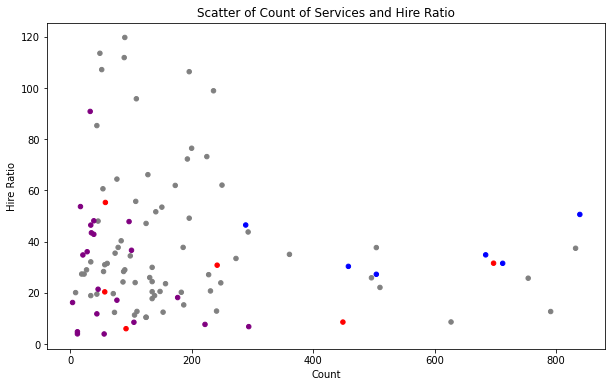

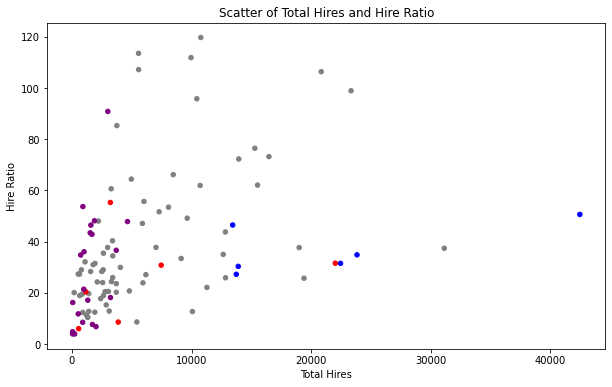

In [19]:
colors = {
    "Home Improvement": "gray",
    "Business": "gray",
    "Pets": "gray",
    "Events": "blue",
    "Wellness": "red",
    "Lessons": "purple",
}

dfCountMergeServices.plot.scatter(
    title="Scatter of Count of Services and Hire Ratio",
    x="Count",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

dfCountMergeServices.plot.scatter(
    title="Scatter of Total Hires and Hire Ratio",
    x="Total Hires",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

From the first scatterplot, it could mean that services with a higher count could mean that there is no clear indication of specialization. It could be that:
- There are too many services for customers to choose from, confusing them
- There are just a lot of competitors, so the sellers would have to share more

# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Top 10 Weight

In [20]:
hiresTopN = (
    df.groupby("Services")["Hires"]
    .nlargest(10)
    .sum(level=0)
    .to_frame(name="Top Hires")
    .reset_index()
)

hireSkew = (
    df.groupby("Services")["Hires"].skew().to_frame(name="Skewness").reset_index()
)

dfHiresSkew = pd.merge(
    dfHiresCountServices[["Services", "Total Hires", "Segments"]],
    hiresTopN,
    on="Services",
)

dfHiresSkew = pd.merge(
    dfHiresSkew, dfServicesCount[["Services", "Count"]], on="Services"
)

dfHiresSkew = pd.merge(dfHiresSkew, hireSkew, on="Services")

dfHiresSkew["Top Weight"] = dfHiresSkew["Top Hires"] / dfHiresSkew["Total Hires"]
dfHiresSkew = dfHiresSkew[
    [
        "Segments",
        "Services",
        "Count",
        "Top Hires",
        "Total Hires",
        "Top Weight",
        "Skewness",
    ]
]
dfHiresSkew[
    (dfHiresSkew["Count"] > 100)
    & (
        (dfHiresSkew["Segments"] == "Events")
        | (dfHiresSkew["Segments"] == "Lessons")
        | (dfHiresSkew["Segments"] == "Wellness")
    )
].sort_values(by="Top Weight", ascending=False)[:20]

,Segments,Services,Count,Top Hires,Total Hires,Top Weight,Skewness
88,Lessons,Saxophone Lessons,105,520.00,896.00,0.58,2.28
80,Lessons,Private Self Defense Lessons,222,728.00,"1,709.00",0.43,4.95
86,Lessons,Reiki Lessons,177,"1,353.00","3,219.00",0.42,4.23
78,Lessons,Piano Lessons,101,"1,542.00","3,701.00",0.42,2.14
83,Wellness,Private Yoga Instruction,449,"1,505.00","3,866.00",0.39,9.45
75,Wellness,Personal Training,242,"2,799.00","7,458.00",0.38,5.55
77,Events,Photo Booth Rental,289,"4,668.00","13,439.00",0.35,4.21
99,Lessons,Violin Lessons,294,521.00,"2,009.00",0.26,2.90
11,Events,Bartending,458,"3,192.00","13,905.00",0.23,3.24
103,Events,Wedding and Event Catering,504,"3,099.00","13,742.00",0.23,3.31


In [26]:
df[df["Services"] == "Saxophone Lessons"].sort_values(
    by="Hires", ascending=False
)[:10]

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
923,Lessons,Saxophone Lessons,Peripheral,Nashville Music Academy,90.00,60.00,hour,5.00,37219,Nashville,Tennessee,TN,"5,400.00"
17183,Lessons,Saxophone Lessons,Peripheral,Musik Mogul,84.00,50.00,hour,5.00,33132,Miami,Florida,FL,"4,200.00"
9771,Lessons,Saxophone Lessons,Peripheral,Continuo Piano Tuning,76.00,80.00,hour,5.00,11021,Great Neck (NYC Suburb),New York,NY,"6,080.00"
70514,Lessons,Saxophone Lessons,Peripheral,Music Academy of Kansas City,63.00,59.00,hour,5.00,64105,Kansas City,Missouri,MO,"3,717.00"
35449,Lessons,Saxophone Lessons,Peripheral,Thomas Kresge Music,48.00,60.00,hour,5.00,10007,New York City,New York,NY,"2,880.00"
35446,Lessons,Saxophone Lessons,Peripheral,Joshua Shneider Music/NYC,38.00,70.00,hour,5.00,10007,New York City,New York,NY,"2,660.00"
27700,Lessons,Saxophone Lessons,Peripheral,Conservatory at Home Denver,33.00,59.00,hour,4.50,80202,Denver,Colorado,CO,"1,947.00"
50685,Lessons,Saxophone Lessons,Peripheral,Andrew Dixon Music Education/Performance,30.00,60.00,hour,5.00,94108,San Francisco,California,CA,"1,800.00"
922,Lessons,Saxophone Lessons,Peripheral,DPV Music Lessons,29.00,79.00,hour,5.00,37219,Nashville,Tennessee,TN,"2,291.00"
10062,Lessons,Saxophone Lessons,Peripheral,GTRx - Play your favorite songs!,29.00,50.00,hour,5.00,28105,Charlotte,North Carolina,NC,"1,450.00"
